# Stock Prediction

Name: Soumya Bhanupriya

Batch: July : Data Science

Aim: Take stock price of the company and predicts its price by using LSTM.




# Import Dependencies 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from datetime import datetime
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

C:\Users\soumy\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Data Collection

In [2]:
# For reading stock data from yahoo
yf.pdr_override()

yfinance: pandas_datareader support is deprecated & semi-broken so will be removed in a future verison. Just use yfinance.


In [3]:
#The tech stocks we'll use for this analysis
tech = ['AAPL', 'GOOG', 'MSFT', 'AMZN'] 

In [4]:
# Set up End and Start times for data grab
#tech= ['AAPL', 'GOOG', 'MSFT', 'AMZN']
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)
for stock in tech:
    globals()[stock] = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


# Data Preparation

In [5]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name    
stock_prediction = pd.concat(company_list, axis=0)
stock_prediction.tail(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-06-21,187.800003,189.279999,185.860001,189.080002,189.080002,72931800,AMAZON
2024-06-24,189.330002,191.000000,185.330002,185.570007,185.570007,50610400,AMAZON
2024-06-25,186.809998,188.839996,185.419998,186.339996,186.339996,45898500,AMAZON
2024-06-26,186.919998,194.800003,186.259995,193.610001,193.610001,65103900,AMAZON
2024-06-27,195.009995,199.839996,194.199997,197.850006,197.850006,74397500,AMAZON
2024-06-28,197.729996,198.850006,192.500000,193.250000,193.250000,76930200,AMAZON
2024-07-01,193.490005,198.300003,192.820007,197.199997,197.199997,41192000,AMAZON
2024-07-02,197.279999,200.429993,195.929993,200.000000,200.000000,45600000,AMAZON
2024-07-03,199.940002,200.029999,196.759995,197.589996,197.589996,31597900,AMAZON


# Analysis

In [6]:
stock_prediction.isnull().sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
company_name    0
dtype: int64

In [7]:
# Summary Stats
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,184.499641,186.115658,183.037450,184.602032,184.143440,6.044509e+07
std,11.591817,11.814245,11.490168,11.711683,11.771700,2.475786e+07
min,165.350006,166.399994,164.080002,165.000000,164.776505,2.404830e+07
25%,175.244995,177.025002,173.660004,175.280006,174.800789,4.687890e+07
50%,183.550003,185.089996,181.919998,183.860001,183.394669,5.376350e+07
75%,191.465004,192.699997,190.255005,191.504997,191.048363,6.617330e+07
max,221.649994,226.449997,221.649994,226.339996,226.339996,2.464214e+08


In [8]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-07-07 to 2024-07-05
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


# Visualization

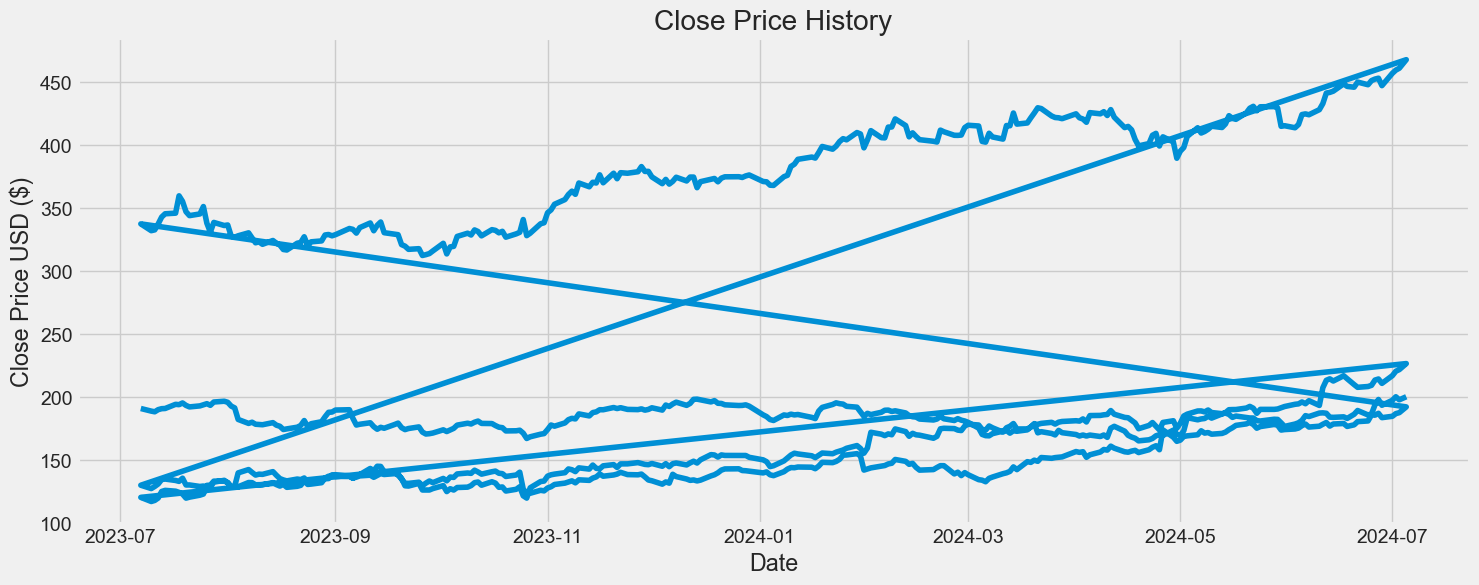

In [9]:
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
plt.figure(figsize=(16, 6))
plt.plot(stock_prediction['Close'])
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.show()

# Historical View of the Closing Price

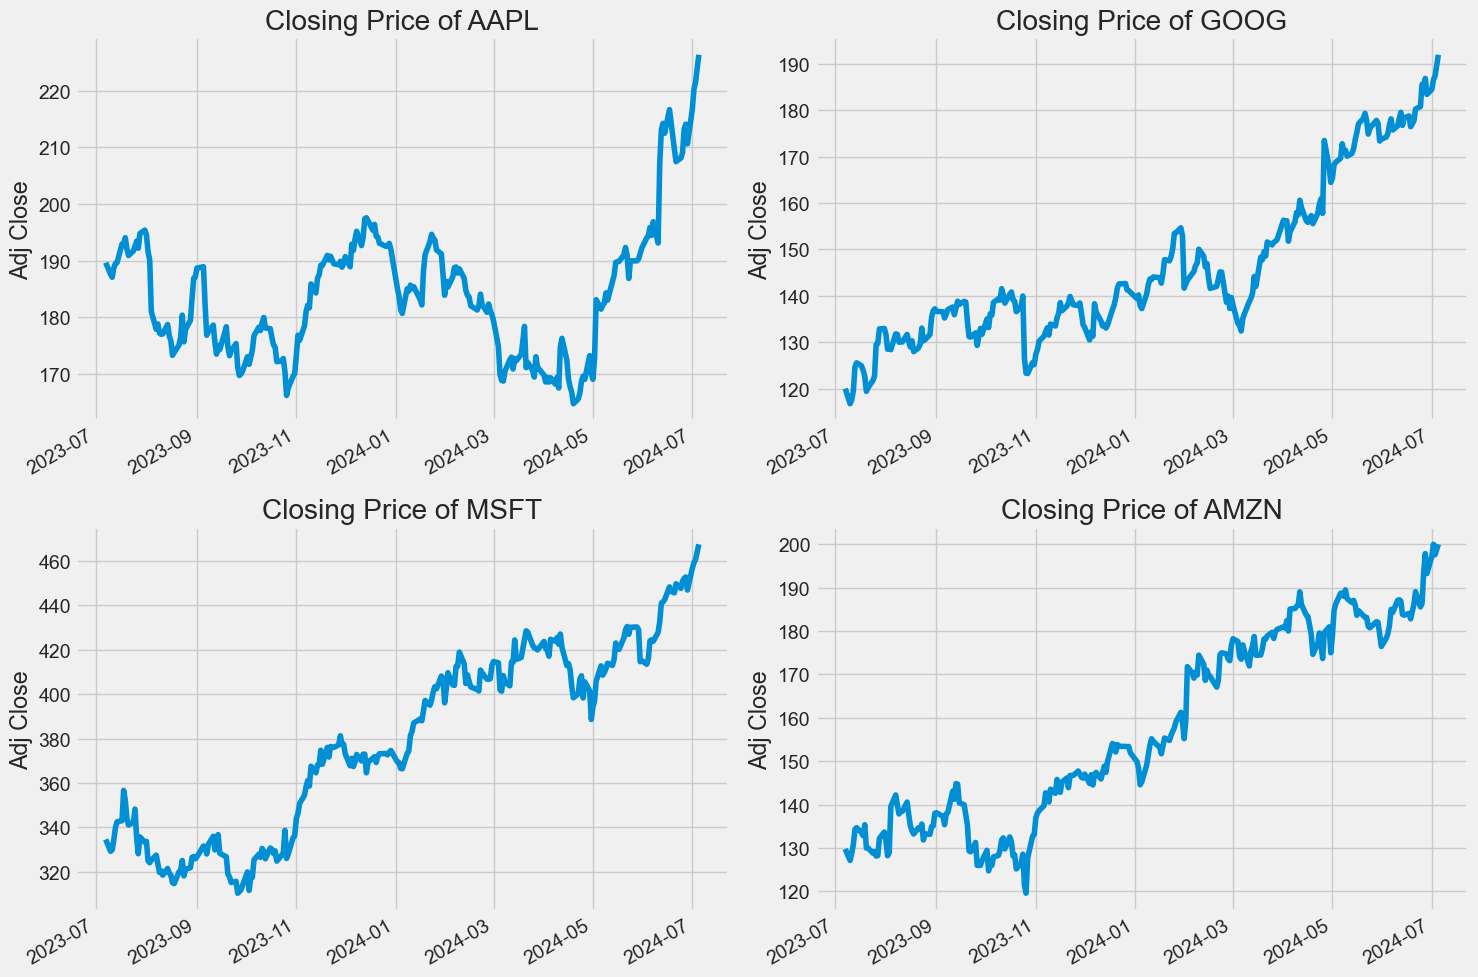

In [10]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    
    # Plot the adjusted close prices
    company['Adj Close'].plot()
    
    # Set labels and title for each subplot
    plt.ylabel('Adj Close')
    plt.xlabel(None)  # Remove x-axis label
    plt.title(f"Closing Price of {tech[i - 1]}")
    
plt.tight_layout()
plt.show()


# Plotting Sales Volume

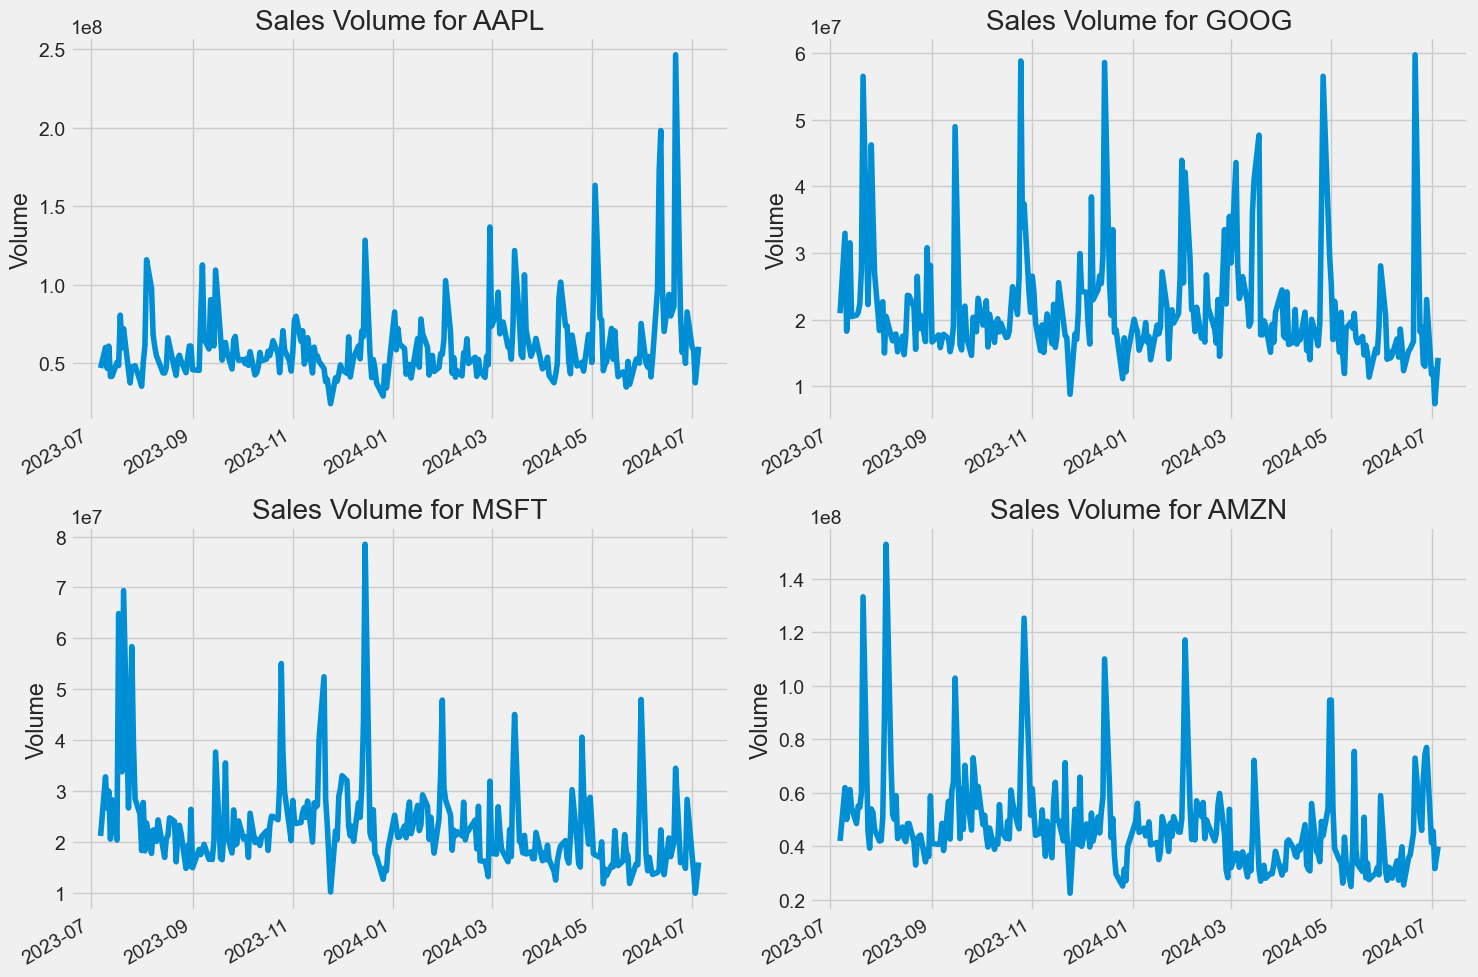

In [11]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech[i - 1]}")
    
plt.tight_layout()


# Moving Averages

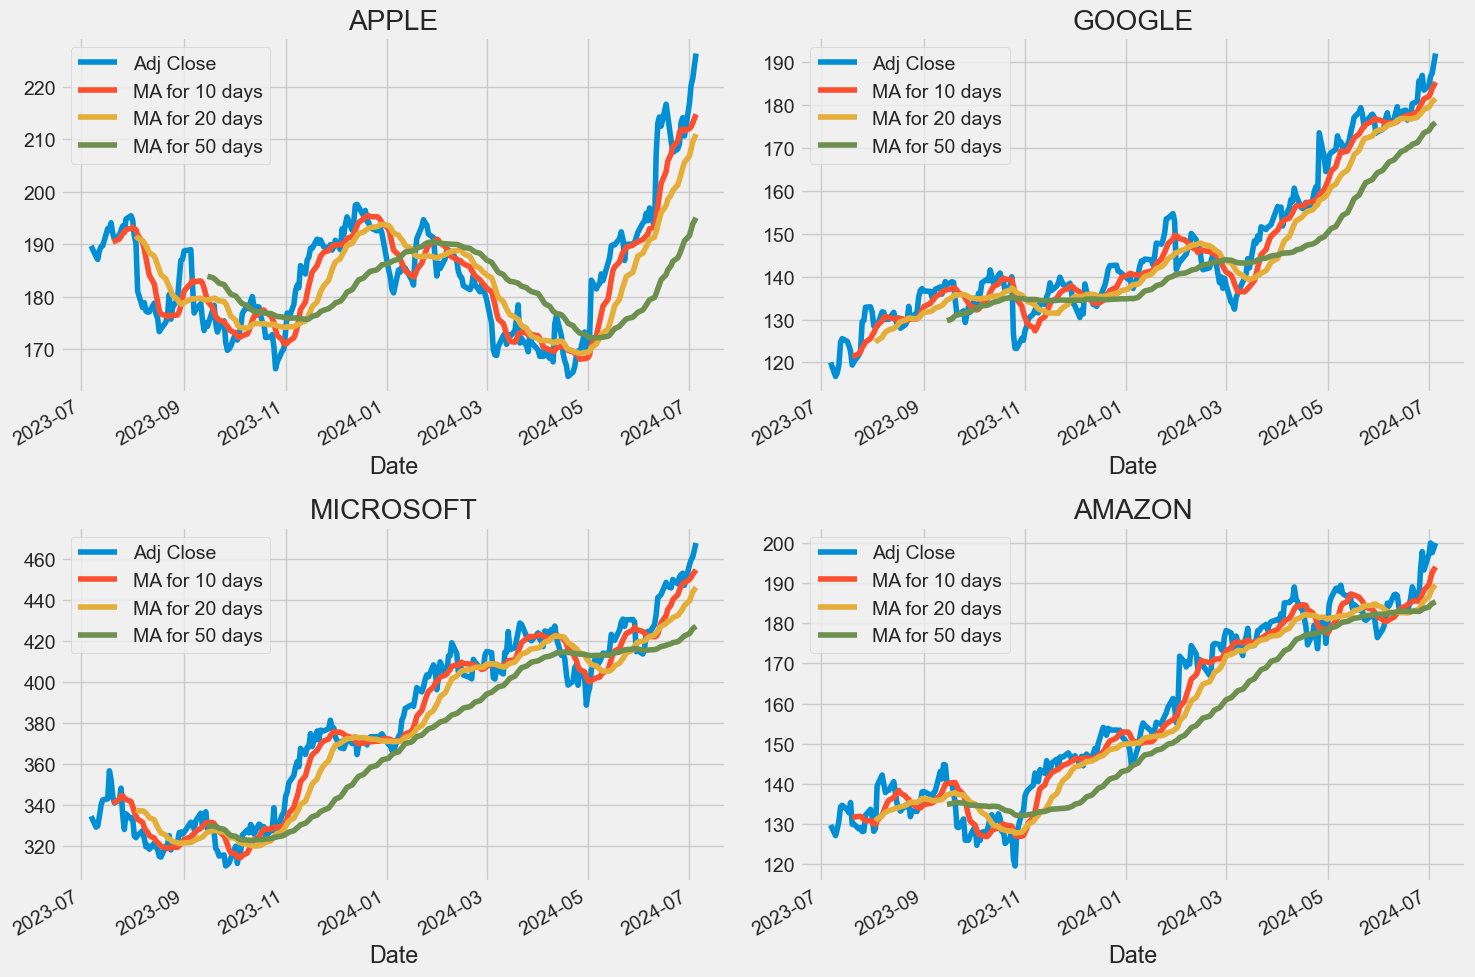

In [12]:
moving_avg_day = [10, 20, 50]
for ma in moving_avg_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()


# Daily Return Percentage

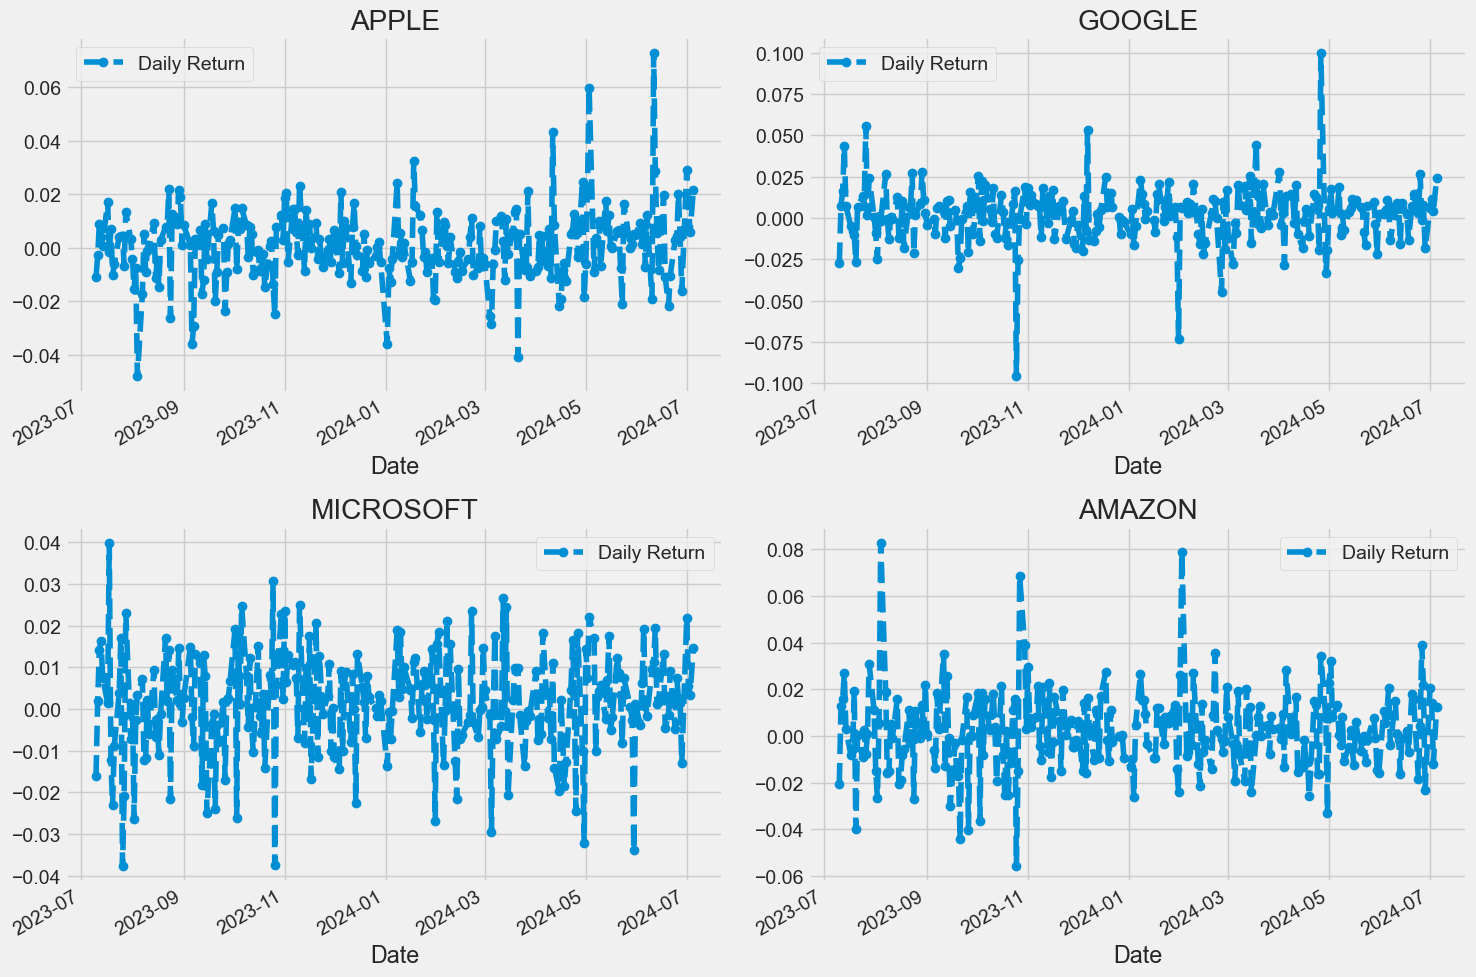

In [13]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()


# Daily Return Histogram

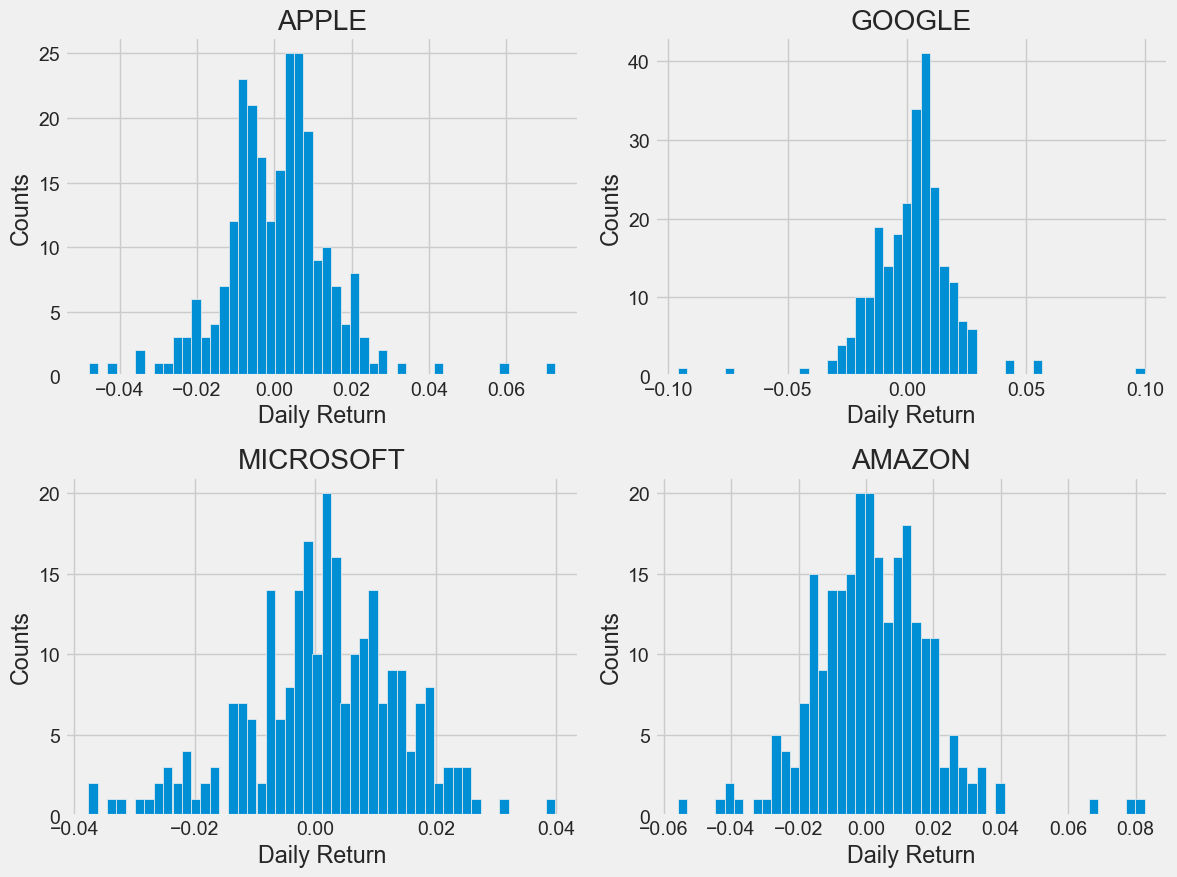

In [14]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
plt.tight_layout()


# Correlation Analysis

In [15]:
# Grab all the closing prices for the tech stock tech into one DataFrame

closing_stock_prediction = pdr.get_data_yahoo(tech, start=start, end=end)['Adj Close']
# Make a new tech returns DataFrame
tech_rets = closing_stock_prediction.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-07-07,NaN,NaN,NaN,NaN
2023-07-10,-0.010856,-0.020419,-0.027218,-0.015984
2023-07-11,-0.002810,0.012979,0.007187,0.001929
2023-07-12,0.008985,0.015686,0.016226,0.014227
2023-07-13,0.004057,0.026758,0.043555,0.016192


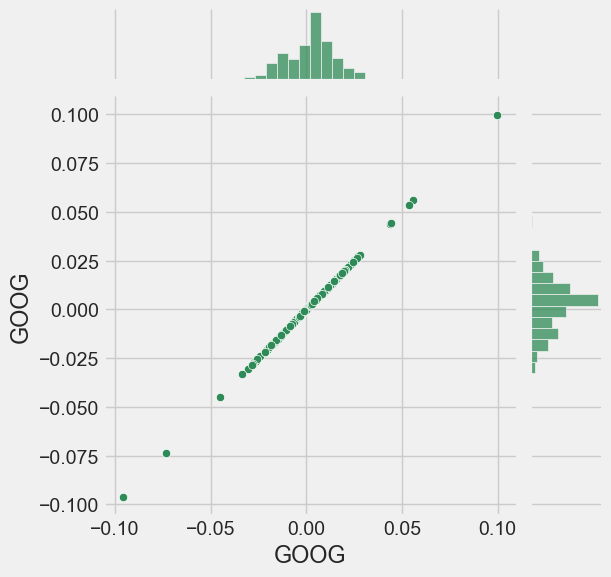

In [16]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

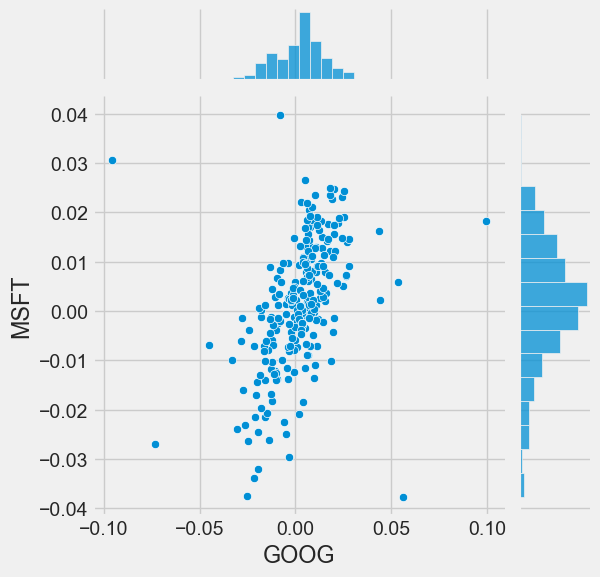

In [17]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

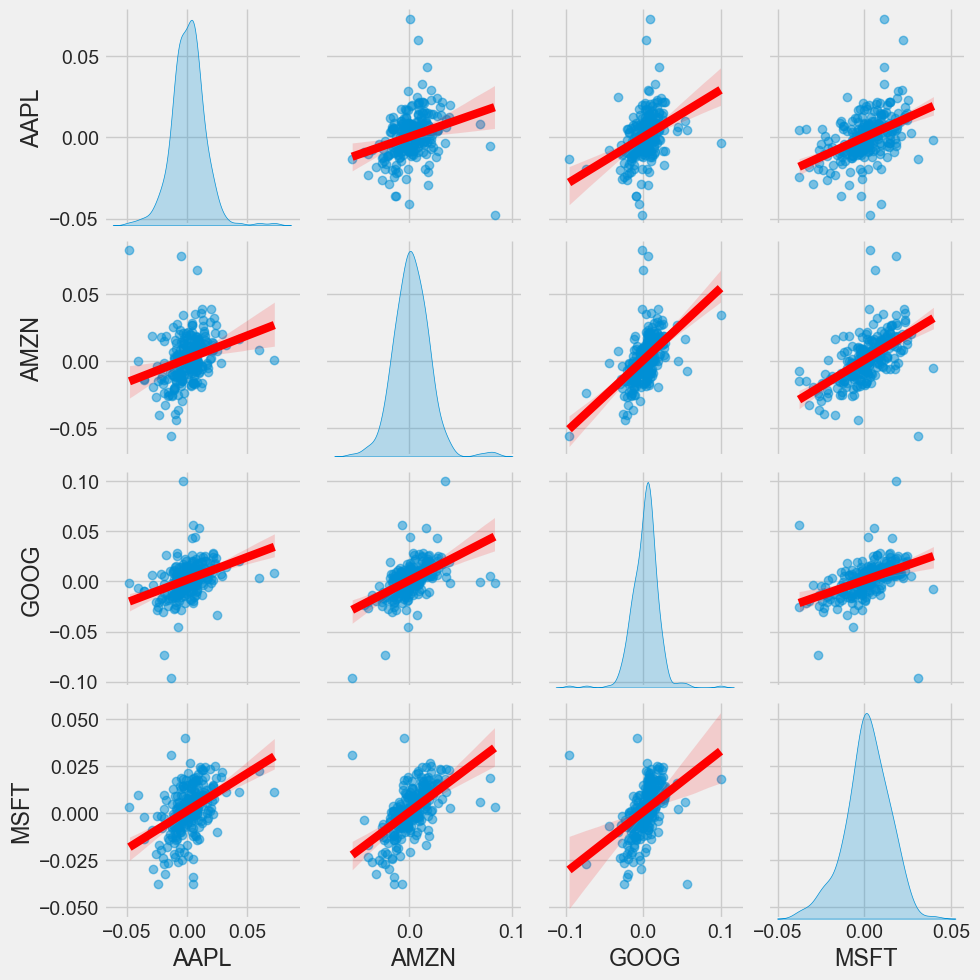

In [18]:
# Custom pairplot
sns.pairplot(tech_rets, kind='reg', diag_kind='kde', plot_kws={'line_kws': {'color': 'red'}, 'scatter_kws': {'alpha': 0.5}})
plt.show()


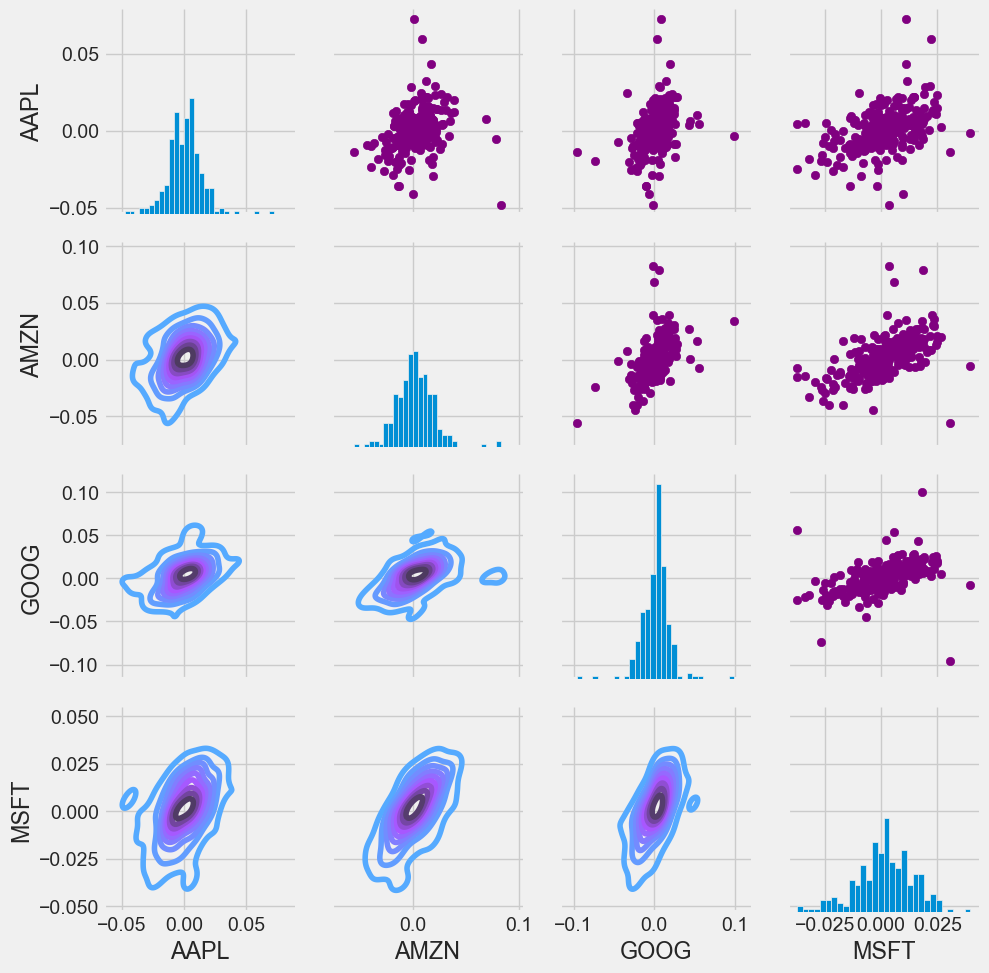

In [19]:
# Set up our figure by naming it returns_fig, call PairGrid on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, including the plot type (kde) 
# and the color map (cool_d)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

# Show the plot
plt.show()


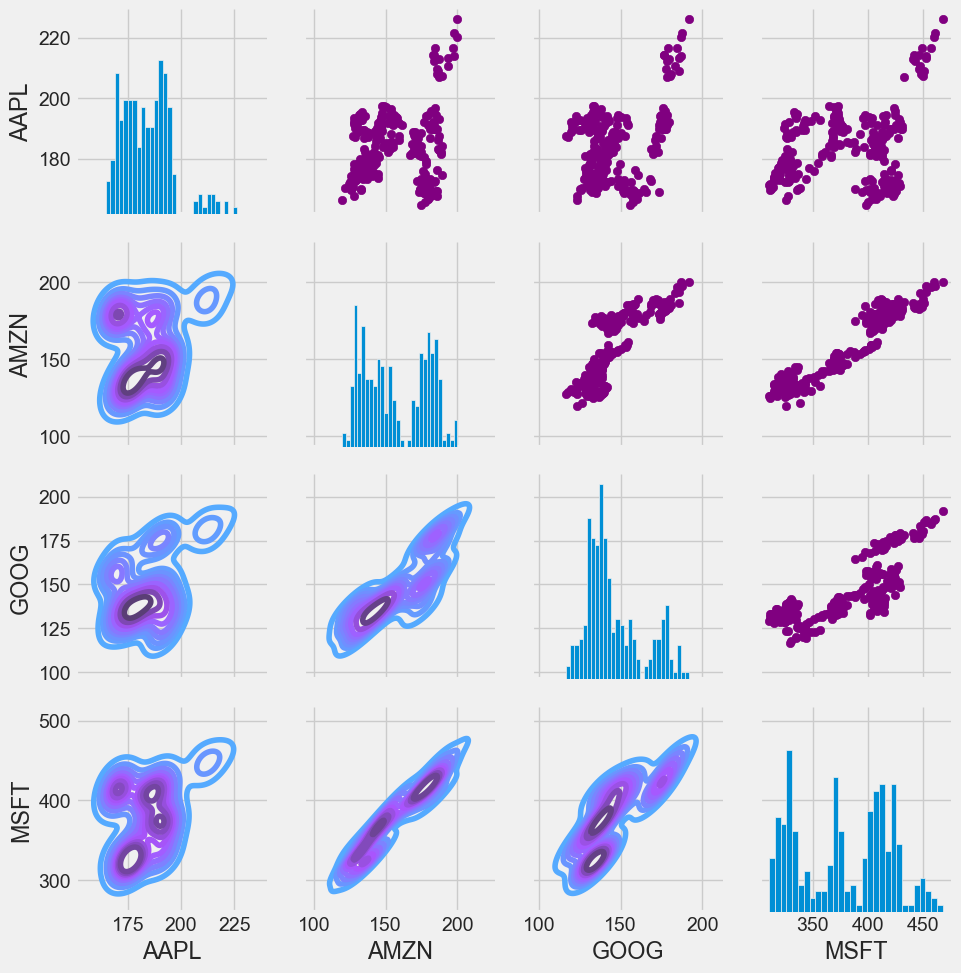

In [20]:
# Set up our figure by naming it returns_fig, call PairGrid on the DataFrame
returns_fig = sns.PairGrid(closing_stock_prediction.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, including the plot type (kde) and the color map (cool_d)
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots
returns_fig.map_diag(plt.hist, bins=30)

# Show the plot
plt.show()


# Correlation Analysis

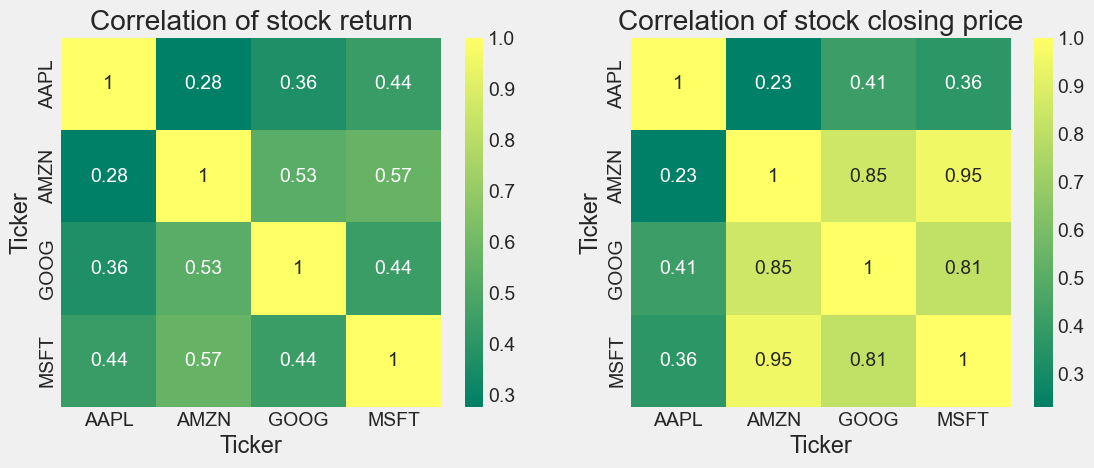

In [21]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_stock_prediction.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')
plt.show()

# Risk vs Expected Return

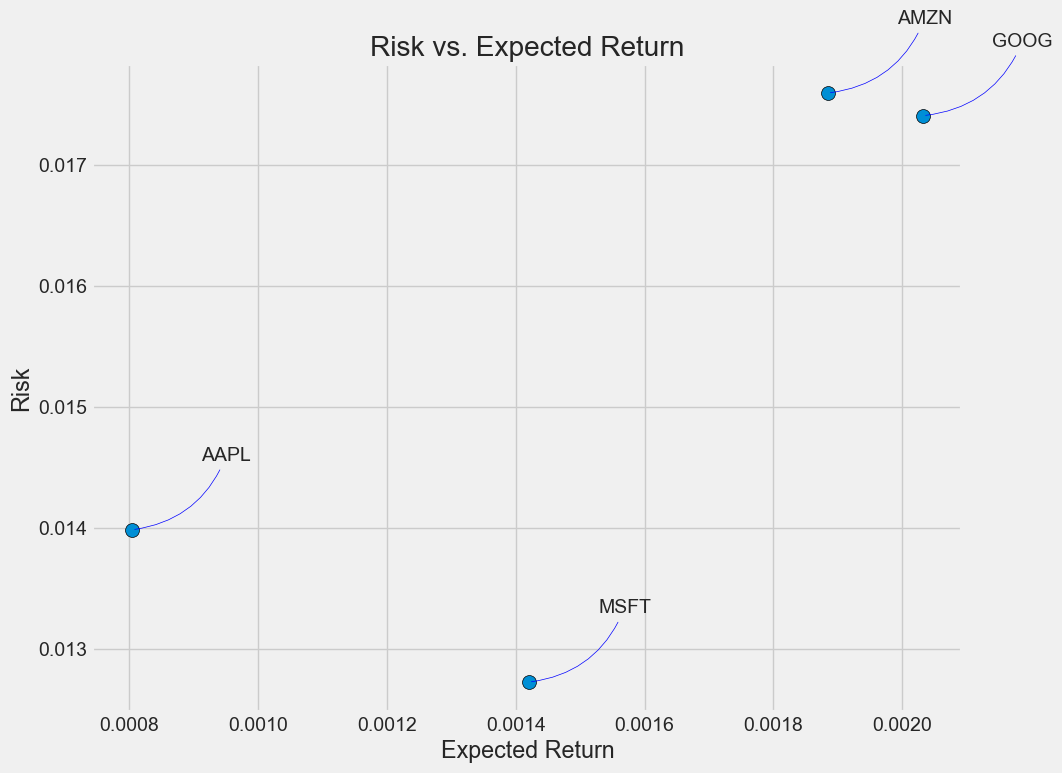

In [22]:
rets = tech_rets.dropna()
plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=100, edgecolors='k')
plt.xlabel('Expected Return')
plt.ylabel('Risk')
plt.title('Risk vs. Expected Return')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))
plt.show()


# Stock Quote for Prediction

In [23]:
# Get the stock quote
stock_prediction = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())
# Show teh data
display(stock_prediction)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.416984,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.483715,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.622306,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.754261,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.734029,394024400
...,...,...,...,...,...,...
2024-06-28,215.770004,216.070007,210.300003,210.619995,210.619995,82542700
2024-07-01,212.089996,217.509995,211.919998,216.750000,216.750000,60402900
2024-07-02,216.149994,220.380005,215.100006,220.270004,220.270004,58046200


[*********************100%%**********************]  1 of 1 completed


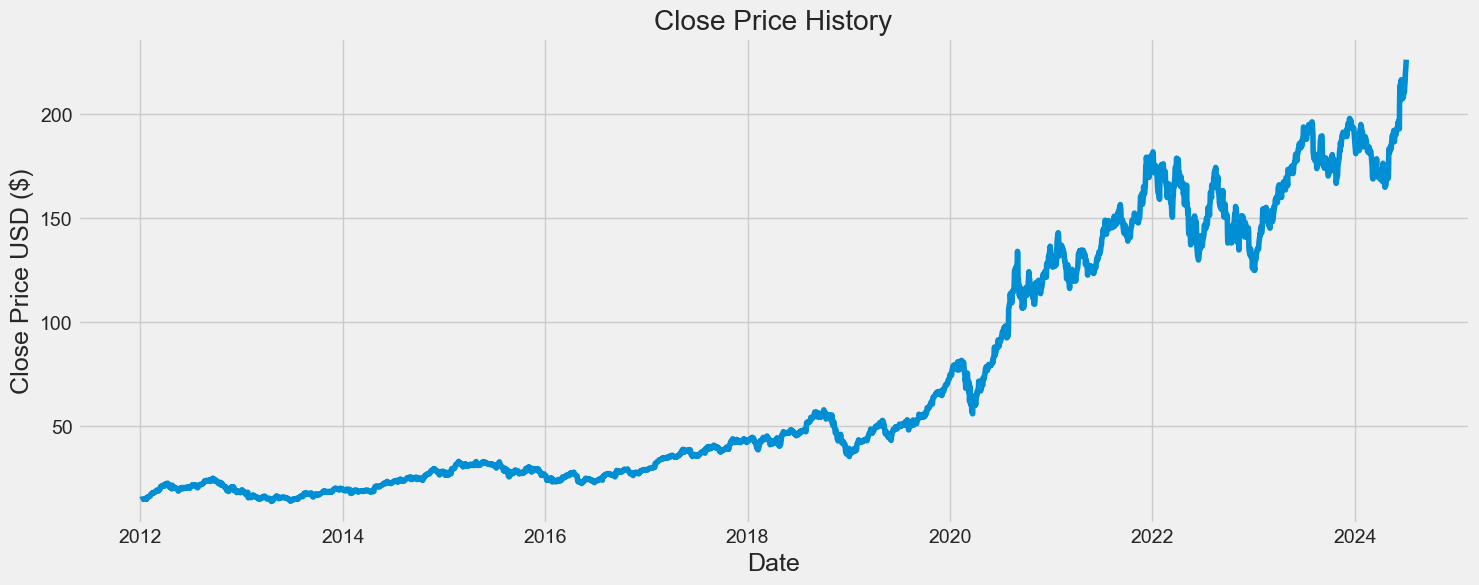

In [24]:
# Get the stock quote
stock_prediction = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())
# Show the data
stock_prediction
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(stock_prediction['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()


# Data Scaling and Preparation for LSTM

In [25]:
# Create a new dataframe with only the 'Close column 
new= stock_prediction.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = new.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2989

In [26]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00348075],
       [0.00385237],
       [0.00462419],
       ...,
       [0.97142087],
       [0.97744745],
       [1.        ]])

# Create the training data set 

In [27]:
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00348075, 0.00385237, 0.00462419, 0.00535901, 0.00524635,
       0.00550026, 0.00538423, 0.00518918, 0.0049235 , 0.00574576,
       0.00648732, 0.00625863, 0.00500589, 0.00620145, 0.00502439,
       0.00943839, 0.00909704, 0.00954264, 0.01050615, 0.01108964,
       0.01104088, 0.01086096, 0.01162773, 0.0123491 , 0.01316633,
       0.01448632, 0.01725915, 0.01730119, 0.01884483, 0.01999835,
       0.01801584, 0.01877925, 0.01876412, 0.0209047 , 0.02060034,
       0.02116364, 0.02217592, 0.02273924, 0.02436191, 0.02554401,
       0.02588536, 0.02600475, 0.02398357, 0.02349592, 0.02356823,
       0.02546835, 0.02600307, 0.02715156, 0.0298588 , 0.03347071,
       0.03279474, 0.03279642, 0.03540783, 0.03622505, 0.03564324,
       0.03511188, 0.03455866, 0.03639656, 0.03765771, 0.03818571])]
[0.036880840658946853]

[array([0.00348075, 0.00385237, 0.00462419, 0.00535901, 0.00524635,
       0.00550026, 0.00538423, 0.00518918, 0.0049235 , 0.00574576,
       0.00648732, 0.00625863, 0.0

# Build the LSTM model

In [28]:

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2929/2929 ━━━━━━━━━━━━━━━━━━━━ 103s 33ms/step - loss: 0.0030


# Create the testing data set

In [29]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

In [30]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 178ms/step


5.228269760689843

#   (RMSE)

In [31]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5.228269760689843

# Visualize the data

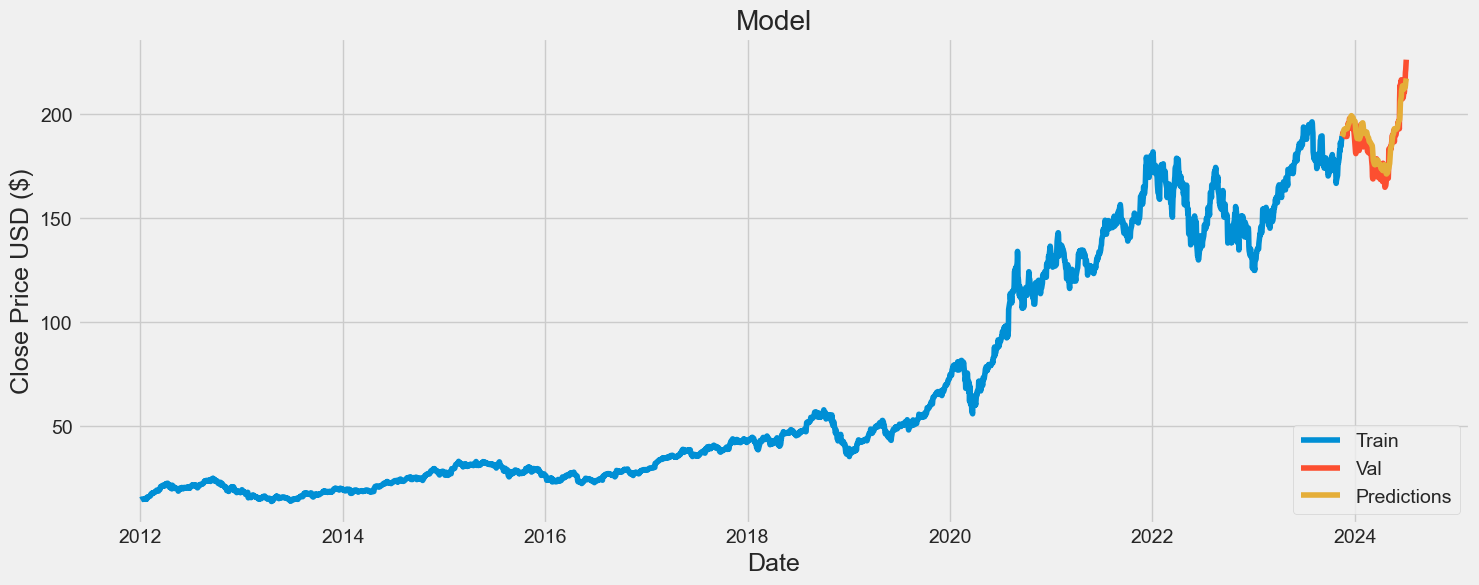

In [32]:
# Plot the data
train = new[:training_data_len]
valid = new[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

# Show the valid and predicted prices

In [33]:
# Show the valid and predicted prices
valid.tail()

,Close,Predictions
Date,,
2024-06-28,210.619995,212.877029
2024-07-01,216.750000,213.092117
2024-07-02,220.270004,213.989960
2024-07-03,221.550003,215.537369
2024-07-05,226.339996,217.317886
